In [1]:
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from data_loader import SRCNN_dataset
from model import SRCNN
from solver import *
from utils import *

import matplotlib.pyplot as plt

%matplotlib inline

train_config = {
    'dir_path': 'Train/',
    'scale': 3,
    'is_gray': True,
    'input_size': 33,
    'label_size': 21,
    'stride': 21
}

val_config = train_config.copy()
val_config['dir_path'] = 'Test/Set14'

test_config = train_config.copy()
test_config['dir_path'] = 'Test/Set5'

train_dataset = SRCNN_dataset(train_config)
val_dataset = SRCNN_dataset(val_config)
test_dataset = SRCNN_dataset(test_config, is_test=True)
print(len(train_dataset))
datasets = {
    'train': train_dataset,
    'val': val_dataset
}

model = SRCNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
solver = Solver(model, datasets, optimizer=optimizer, batch_size=128, num_epochs= 50, verbose=True)
#print(solver)

10104


In [2]:
solver.train()


epoch     0 iter     0, loss 0.22964
epoch     0 iter    10, loss 0.12508
epoch     0 iter    20, loss 0.06763
epoch     0 iter    30, loss 0.01934
epoch     0 iter    40, loss 0.01022
epoch     0 iter    50, loss 0.01238
epoch     0 iter    60, loss 0.00924
epoch     0 iter    70, loss 0.00776
epoch     1 iter     0, loss 0.00753
epoch     1 iter    10, loss 0.00797
epoch     1 iter    20, loss 0.00560
epoch     1 iter    30, loss 0.00638
epoch     1 iter    40, loss 0.00638
epoch     1 iter    50, loss 0.00625
epoch     1 iter    60, loss 0.00621
epoch     1 iter    70, loss 0.00557
epoch     2 iter     0, loss 0.00659
epoch     2 iter    10, loss 0.00557
epoch     2 iter    20, loss 0.00394
epoch     2 iter    30, loss 0.00533
epoch     2 iter    40, loss 0.00494
epoch     2 iter    50, loss 0.00468
epoch     2 iter    60, loss 0.00411
epoch     2 iter    70, loss 0.00428
epoch     3 iter     0, loss 0.00363
epoch     3 iter    10, loss 0.00458
epoch     3 iter    20, loss 0.00339
e

epoch    28 iter     0, loss 0.00279
epoch    28 iter    10, loss 0.00222
epoch    28 iter    20, loss 0.00241
epoch    28 iter    30, loss 0.00235
epoch    28 iter    40, loss 0.00196
epoch    28 iter    50, loss 0.00285
epoch    28 iter    60, loss 0.00242
epoch    28 iter    70, loss 0.00254
epoch    29 iter     0, loss 0.00243
epoch    29 iter    10, loss 0.00226
epoch    29 iter    20, loss 0.00210
epoch    29 iter    30, loss 0.00231
epoch    29 iter    40, loss 0.00266
epoch    29 iter    50, loss 0.00231
epoch    29 iter    60, loss 0.00298
epoch    29 iter    70, loss 0.00285
epoch    30 iter     0, loss 0.00265
epoch    30 iter    10, loss 0.00258
epoch    30 iter    20, loss 0.00276
epoch    30 iter    30, loss 0.00273
epoch    30 iter    40, loss 0.00263
epoch    30 iter    50, loss 0.00272
epoch    30 iter    60, loss 0.00293
epoch    30 iter    70, loss 0.00255
epoch    31 iter     0, loss 0.00187
epoch    31 iter    10, loss 0.00296
epoch    31 iter    20, loss 0.00164
e

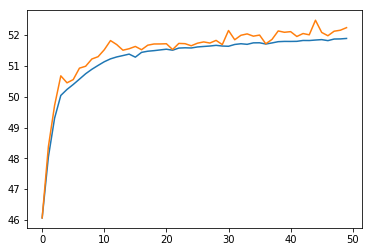

In [3]:
plt.plot(solver.hist_train_psnr)
plt.plot(solver.hist_val_psnr)

#print(solver.hist_train_psnr)
#print(solver.hist_val_psnr)

In [5]:
solver.check_PSNR(test_dataset, is_test=True, batch_size=1)

27.9706169128418